In [157]:
import numpy as np
import pandas as pd
import re

In [158]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [159]:
df = pd.read_csv('2_gurgaon_properties_cleaned_v1.csv')

In [160]:
df.shape

(3802, 17)

In [161]:
df.duplicated().sum()

122

In [162]:
df.drop_duplicates(inplace=True)

In [163]:
df.shape

(3680, 17)

In [164]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,godrej,sector 79,1.3,8269.0,1572.0,Super Built up area 1572(146.04 sq.m.),2,2,3,study room,3.0,North-East,0 to 1 Year Old,"['Vatika Town Square-INXT', 'Naurangpur Road', 'NH 48', 'Euro International School', 'Gurugram University', 'Miracles Apollo Cradle', 'Nouveau Medics Multispeciality OPD', 'Indira Gandhi Intl Airport', 'Heritage Village Resort & Spa', 'Nakhrola Stadium']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


## 1. areaWithType

In [165]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
40,2.98,1449.0,Plot area 161(134.62 sq.m.)
1112,1.72,2200.0,Carpet area: 2200 (204.39 sq.m.)
251,2.00,2360.0,Super Built up area 2366(219.81 sq.m.)Built Up area: 1963 sq.ft. (182.37 sq.m.)Carpet area: 1629 sq.ft. (151.34 sq.m.)
1361,5.80,4640.0,Built Up area: 3700 (343.74 sq.m.)
4,0.80,900.0,Plot area 900(83.61 sq.m.)Built Up area: 900 sq.ft. (83.61 sq.m.)


In [166]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [167]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [168]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [169]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [170]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
915,6.50,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
1168,0.80,house,675.0,Plot area 75(62.71 sq.m.),NaN,NaN,NaN
3357,0.88,flat,1478.0,Super Built up area 1485(137.96 sq.m.),1485.0,NaN,NaN
66,2.20,flat,2095.0,Super Built up area 2095(194.63 sq.m.)Built Up area: 1860 sq.ft. (172.8 sq.m.),2095.0,1860.0,NaN
456,0.40,house,450.0,Plot area 50(41.81 sq.m.),NaN,NaN,NaN


In [171]:
# All area values
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(531, 7)

In [172]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,0.80,house,900.0,Plot area 900(83.61 sq.m.)Built Up area: 900 sq.ft. (83.61 sq.m.),NaN,900.0,NaN
17,0.85,house,900.0,Plot area 900(83.61 sq.m.),NaN,NaN,NaN
19,0.70,house,1160.0,Plot area 1160(107.77 sq.m.),NaN,NaN,NaN
28,2.35,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
30,9.90,house,3375.0,Plot area 375(313.55 sq.m.),NaN,NaN,NaN


In [173]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    17
price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1048
agePossession             1
nearbyLocations         170
furnishDetails          946
features                599
super_built_up_area    1805
built_up_area          2533
carpet_area            1806
dtype: int64

In [174]:
# houses Area
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [175]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
17,0.85,house,900.0,Plot area 900(83.61 sq.m.),NaN,NaN,NaN
19,0.70,house,1160.0,Plot area 1160(107.77 sq.m.),NaN,NaN,NaN
28,2.35,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
30,9.90,house,3375.0,Plot area 375(313.55 sq.m.),NaN,NaN,NaN
37,2.55,house,1557.0,Plot area 173(144.65 sq.m.),NaN,NaN,NaN


In [176]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [177]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [178]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [179]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
17,0.85,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
19,0.70,house,1160.0,Plot area 1160(107.77 sq.m.),NaN,1160.00,NaN
28,2.35,house,1440.0,Plot area 160(133.78 sq.m.),NaN,160.00,NaN
30,9.90,house,3375.0,Plot area 375(313.55 sq.m.),NaN,375.00,NaN
37,2.55,house,1557.0,Plot area 173(144.65 sq.m.),NaN,173.00,NaN
40,2.98,house,1449.0,Plot area 161(134.62 sq.m.),NaN,161.00,NaN
56,0.40,house,432.0,Plot area 432(40.13 sq.m.),NaN,432.00,NaN
74,6.75,house,6228.0,Plot area 692(578.6 sq.m.),NaN,692.00,NaN
75,2.40,house,900.0,Plot area 100(83.61 sq.m.),NaN,100.00,NaN
80,7.00,house,5400.0,Plot area 600(501.68 sq.m.),NaN,600.00,NaN


In [180]:
# Units are not consistent for the areas so lets make them consistent
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.76
        else:
            return row['built_up_area']

In [181]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [182]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
17,0.85,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
19,0.70,house,1160.0,Plot area 1160(107.77 sq.m.),NaN,1160.00,NaN
28,2.35,house,1440.0,Plot area 160(133.78 sq.m.),NaN,1440.00,NaN
30,9.90,house,3375.0,Plot area 375(313.55 sq.m.),NaN,3375.00,NaN
37,2.55,house,1557.0,Plot area 173(144.65 sq.m.),NaN,1557.00,NaN
40,2.98,house,1449.0,Plot area 161(134.62 sq.m.),NaN,1449.00,NaN
56,0.40,house,432.0,Plot area 432(40.13 sq.m.),NaN,432.00,NaN
74,6.75,house,6228.0,Plot area 692(578.6 sq.m.),NaN,6228.00,NaN
75,2.40,house,900.0,Plot area 100(83.61 sq.m.),NaN,900.00,NaN
80,7.00,house,5400.0,Plot area 600(501.68 sq.m.),NaN,5400.00,NaN


In [183]:
# update the original dataframe
df.update(all_nan_df)

In [184]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    17
price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1048
agePossession             1
nearbyLocations         170
furnishDetails          946
features                599
super_built_up_area    1805
built_up_area          1988
carpet_area            1806
dtype: int64

In [185]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,godrej,sector 79,1.30,8269.0,1572.0,Super Built up area 1572(146.04 sq.m.),2,2,3,study room,3.0,North-East,0 to 1 Year Old,"['Vatika Town Square-INXT', 'Naurangpur Road', 'NH 48', 'Euro International School', 'Gurugram University', 'Miracles Apollo Cradle', 'Nouveau Medics Multispeciality OPD', 'Indira Gandhi Intl Airport', 'Heritage Village Resort & Spa', 'Nakhrola Stadium']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1572.0,NaN,NaN
1,flat,trisara our homes 3,sohna road,0.21,4339.0,484.0,Built Up area: 484 (44.97 sq.m.),1,1,0,not available,2.0,NaN,undefined,"['Metro Station', 'Gyanchand Market', 'Rajiv Chowk', 'KMP Expressway', 'Govt.Sr.Sec School(boys)', 'Jindal College', 'Kidzee', 'Vishvakarma Mandir', 'Mamta Hospital', 'Fortis', 'IGI T3', 'Oriental Bank of Commerce', 'Rajiv Gandhi Park']",NaN,NaN,NaN,484.0,NaN
2,flat,spaze privvy the address,sector 93,1.45,8033.0,1805.0,Super Built up area 1805(167.69 sq.m.)Built Up area: 1350 sq.ft. (125.42 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.),3,4,2,not available,12.0,North-East,1 to 5 Year Old,"['Sapphire 83 Mall', 'Hayatpur Road', 'Dwarka Expy', 'Pranavananda International School', 'Royal Institute Of Science & MGMT', 'Aarvy Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction', 'Holiday Inn Gurugram Sector 90']","['1 Water Purifier', '5 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '70 Light', '4 AC', '1 Chimney', '16 Curtains', '1 Modular Kitchen', '3 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Recently Renovated', 'Visitor Parking', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors']",1805.0,1350.0,1100.0
3,flat,experion the heartsong,sector 108,0.90,7014.0,1283.0,Super Built up area 1283(119.19 sq.m.),2,3,3,"others,servant room",7.0,East,1 to 5 Year Old,"['Galleria 108 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'The Shikshiyan School', 'Manipal Hospital', 'Indira Gandhi International Airport', 'Vivanta New Delhi, Dwarka', 'SkyJumper Trampoline Park', 'Fun N Food Village']","['1 Water Purifier', '1 Exhaust Fan', '3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",1283.0,NaN,NaN
4,house,house number b-34,sector 5,0.80,8888.0,900.0,Plot area 900(83.61 sq.m.)Built Up area: 900 sq.ft. (83.61 sq.m.),2,2,1,not available,1.0,NaN,10+ Year Old,NaN,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,900.0,NaN


## 2.additionalRoom

In [186]:
df['additionalRoom'].sample(5)

509           not available
2951    servant room,others
2526             pooja room
1352          not available
3777          not available
Name: additionalRoom, dtype: object

In [187]:
df['additionalRoom'].value_counts()

not available                                    1516
servant room                                      687
study room                                        243
others                                            219
pooja room                                        164
store room                                         97
study room,servant room                            97
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                55
pooja room,study room,servant room,others          54
pooja room,study room,servant room                 53
servant room,pooja room                            38
servant room,store room                            31
study room,others                                  26
pooja room,study room                              21
pooja room,others                                  16
pooja room,store room                              15
servant room,study room     

In [188]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [189]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3437,not available,0,0,0,0,0
3569,"pooja room,study room,servant room,store room",1,1,1,1,0
3080,servant room,0,1,0,0,0
2496,store room,0,0,1,0,0
2892,others,0,0,0,0,1


In [190]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,godrej,sector 79,1.30,8269.0,1572.0,Super Built up area 1572(146.04 sq.m.),2,2,3,study room,3.0,North-East,0 to 1 Year Old,"['Vatika Town Square-INXT', 'Naurangpur Road', 'NH 48', 'Euro International School', 'Gurugram University', 'Miracles Apollo Cradle', 'Nouveau Medics Multispeciality OPD', 'Indira Gandhi Intl Airport', 'Heritage Village Resort & Spa', 'Nakhrola Stadium']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1572.0,NaN,NaN,1,0,0,0,0
1,flat,trisara our homes 3,sohna road,0.21,4339.0,484.0,Built Up area: 484 (44.97 sq.m.),1,1,0,not available,2.0,NaN,undefined,"['Metro Station', 'Gyanchand Market', 'Rajiv Chowk', 'KMP Expressway', 'Govt.Sr.Sec School(boys)', 'Jindal College', 'Kidzee', 'Vishvakarma Mandir', 'Mamta Hospital', 'Fortis', 'IGI T3', 'Oriental Bank of Commerce', 'Rajiv Gandhi Park']",NaN,NaN,NaN,484.0,NaN,0,0,0,0,0
2,flat,spaze privvy the address,sector 93,1.45,8033.0,1805.0,Super Built up area 1805(167.69 sq.m.)Built Up area: 1350 sq.ft. (125.42 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.),3,4,2,not available,12.0,North-East,1 to 5 Year Old,"['Sapphire 83 Mall', 'Hayatpur Road', 'Dwarka Expy', 'Pranavananda International School', 'Royal Institute Of Science & MGMT', 'Aarvy Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction', 'Holiday Inn Gurugram Sector 90']","['1 Water Purifier', '5 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '70 Light', '4 AC', '1 Chimney', '16 Curtains', '1 Modular Kitchen', '3 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Recently Renovated', 'Visitor Parking', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors']",1805.0,1350.0,1100.0,0,0,0,0,0
3,flat,experion the heartsong,sector 108,0.90,7014.0,1283.0,Super Built up area 1283(119.19 sq.m.),2,3,3,"others,servant room",7.0,East,1 to 5 Year Old,"['Galleria 108 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'The Shikshiyan School', 'Manipal Hospital', 'Indira Gandhi International Airport', 'Vivanta New Delhi, Dwarka', 'SkyJumper Trampoline Park', 'Fun N Food Village']","['1 Water Purifier', '1 Exhaust Fan', '3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",1283.0,NaN,NaN,0,1,0,0,1
4,house,house number b-34,sector 5,0.80,8888.0,900.0,Plot area 900(83.61 sq.m.)Built Up area: 900 sq.ft. (83.61 sq.m.),2,2,1,not available,1.0,NaN,10+ Year Old,NaN,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,900.0,NaN,0,0,0,0,0


## 3.agePossession

In [191]:
df['agePossession'].value_counts()

1 to 5 Year Old       1645
5 to 10 Year Old       563
0 to 1 Year Old        503
undefined              307
10+ Year Old           303
Under Construction      88
Within 6 months         67
Within 3 months         24
Dec-23                  18
By 2023                 17
By 2024                 16
Dec-24                  14
Mar-24                  12
Dec-25                   7
Aug-23                   6
Jan-24                   6
Nov-23                   5
Oct-24                   5
Jun-24                   5
Aug-24                   4
Sep-23                   4
By 2025                  4
Jan-25                   3
Oct-23                   3
May-24                   3
Nov-24                   3
Jul-24                   3
Feb-24                   3
Jun-27                   2
Dec 2023                 2
Dec-26                   2
Jan-26                   2
Jun 2024                 2
Sep-25                   2
Aug-25                   2
Jul-27                   2
Apr-26                   2
M

In [192]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [193]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [194]:
df['agePossession'].value_counts()

Relatively New        1645
New Property           594
Moderately Old         563
Undefined              440
Old Property           303
Under Construction     135
Name: agePossession, dtype: int64

In [195]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,godrej,sector 79,1.30,8269.0,1572.0,Super Built up area 1572(146.04 sq.m.),2,2,3,study room,3.0,North-East,New Property,"['Vatika Town Square-INXT', 'Naurangpur Road', 'NH 48', 'Euro International School', 'Gurugram University', 'Miracles Apollo Cradle', 'Nouveau Medics Multispeciality OPD', 'Indira Gandhi Intl Airport', 'Heritage Village Resort & Spa', 'Nakhrola Stadium']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1572.0,NaN,NaN,1,0,0,0,0
1,flat,trisara our homes 3,sohna road,0.21,4339.0,484.0,Built Up area: 484 (44.97 sq.m.),1,1,0,not available,2.0,NaN,Undefined,"['Metro Station', 'Gyanchand Market', 'Rajiv Chowk', 'KMP Expressway', 'Govt.Sr.Sec School(boys)', 'Jindal College', 'Kidzee', 'Vishvakarma Mandir', 'Mamta Hospital', 'Fortis', 'IGI T3', 'Oriental Bank of Commerce', 'Rajiv Gandhi Park']",NaN,NaN,NaN,484.0,NaN,0,0,0,0,0
2,flat,spaze privvy the address,sector 93,1.45,8033.0,1805.0,Super Built up area 1805(167.69 sq.m.)Built Up area: 1350 sq.ft. (125.42 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.),3,4,2,not available,12.0,North-East,Relatively New,"['Sapphire 83 Mall', 'Hayatpur Road', 'Dwarka Expy', 'Pranavananda International School', 'Royal Institute Of Science & MGMT', 'Aarvy Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction', 'Holiday Inn Gurugram Sector 90']","['1 Water Purifier', '5 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '70 Light', '4 AC', '1 Chimney', '16 Curtains', '1 Modular Kitchen', '3 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Recently Renovated', 'Visitor Parking', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors']",1805.0,1350.0,1100.0,0,0,0,0,0
3,flat,experion the heartsong,sector 108,0.90,7014.0,1283.0,Super Built up area 1283(119.19 sq.m.),2,3,3,"others,servant room",7.0,East,Relatively New,"['Galleria 108 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'The Shikshiyan School', 'Manipal Hospital', 'Indira Gandhi International Airport', 'Vivanta New Delhi, Dwarka', 'SkyJumper Trampoline Park', 'Fun N Food Village']","['1 Water Purifier', '1 Exhaust Fan', '3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",1283.0,NaN,NaN,0,1,0,0,1
4,house,house number b-34,sector 5,0.80,8888.0,900.0,Plot area 900(83.61 sq.m.)Built Up area: 900 sq.ft. (83.61 sq.m.),2,2,1,not available,1.0,NaN,Old Property,NaN,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,900.0,NaN,0,0,0,0,0


## 4.furnishDetails

In [196]:
df

Output hidden; open in https://colab.research.google.com to view.

In [197]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
2189,"['1 Fan', '1 Geyser', '1 Light', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2751,[],"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
135,"['13 Light', '8 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1494,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN
2773,NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [198]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [199]:
furnishings_df.shape

(3680, 19)

In [200]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-200-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [201]:
furnishings_df.sample(5)

,TV,AC,Washing Machine,Fridge,Light,Wardrobe,Dining Table,Chimney,Curtains,Water Purifier,Stove,Bed,Exhaust Fan,Fan,Geyser,Sofa,Microwave,Modular Kitchen
2386,0,0,0,0,9,2,0,1,1,0,0,1,0,3,0,0,0,1
92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3437,0,0,0,0,15,2,0,1,0,0,0,0,0,3,0,0,0,1
1034,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1269,0,0,0,0,23,9,0,0,0,0,0,0,1,13,0,0,0,1


In [202]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [203]:
scaler=StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [204]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

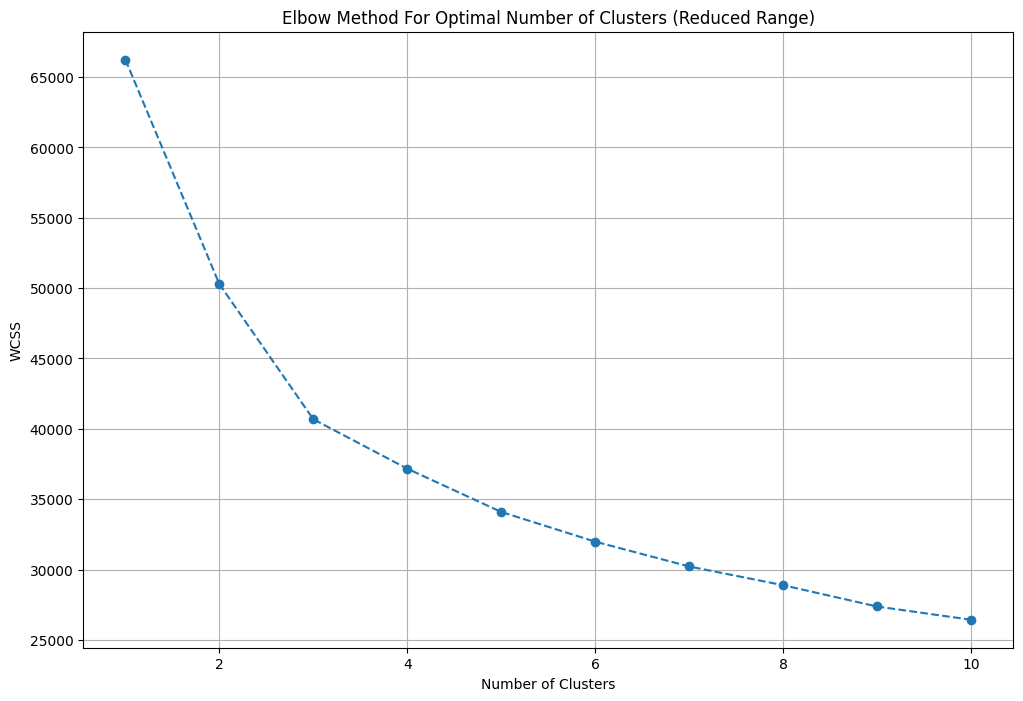

In [205]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [206]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [207]:
df = df.iloc[:,:-18]

In [208]:
df['furnishing_type'] = cluster_assignments

In [209]:
df.sample(5)[['furnishDetails','furnishing_type']]
# By observation you can colnclude that
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
2838,"['1 Exhaust Fan', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
1434,NaN,0
1710,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
748,"['3 Wardrobe', '3 Fan', '1 Exhaust Fan', '6 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
2295,"['5 Wardrobe', '4 Fan', '3 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0


## 5.features

In [210]:
df[['society','features']].sample(5)

,society,features
783,ashok vihar phase 3 gurgaon,['Park']
202,parsvnath green ville,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Fitness Centre / GYM', 'Club house / Community Center']"
426,bestech park view city,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
799,eldeco mansionz,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
332,emaar mgf emerald floors premier,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [211]:
df['features'].isnull().sum()

599

In [213]:
import pandas as pd
app_df = pd.read_csv('2_appartments.csv')
app_df.head(2)

FileNotFoundError: ignored

In [ ]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [ ]:
temp_df = df[df['features'].isnull()]

In [ ]:
temp_df.shape

In [ ]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [ ]:
df.loc[temp_df.index,'features'] = x.values

In [ ]:
df['features'].isnull().sum()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [ ]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [ ]:
features_binary_df.sample(5)

In [ ]:
features_binary_df.shape

In [ ]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

In [ ]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
# clustering are off, lot of nan values are getting into one cluster
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(features_binary_df)
df['pred']=kmeans.predict(features_binary_df)
df[['features','pred']]

In [ ]:
# Change the approach instead, Let's create a luxury score column with weights to each features
# Define the weights for each feature as provided (Chat gpt)
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [ ]:
df['luxury_score'] = luxury_score

In [ ]:
df['luxury_score'].sample(2)

In [ ]:
df.head()

In [ ]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [ ]:
df.sample(5)

In [ ]:
df.shape

In [ ]:
df.to_csv('3_gurgaon_properties_cleaned_v2.csv',index=False)